<img src="./logo.png" style="width:1200px;height:250px"/>


## Ilum Escola de Ciência 
###  Curso: Análise Numérica
### Professor: Vinicius Wasques
### Aluno: Isabela Beneti
### Método de Simpson

## Importações

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

##  a) Determine o valor exato da área determinada pela função $f(x)$ no intervalo [0,2].

Para calcular *exatamente* o valor da área determinada pela função $f(x)$ no intervalo determinado, basta calcular a integral dessa função.
Como sabemos, o valor da integral infinita da função $e^x$ é o próprio $e^x$, adicionado a uma constante de integração $C$. Ou seja, $\int e^x dx = e^x + C $.

Agora, para calcular o valor dessa mesma integral no intervalo [0,2] basta subtrair o valor da integral no ponto 2 pelo valor da integral no ponto 0. Logo

$$ \int_{0}^{2} e^x \, dx = e^2 + C - (e^0 + C) = e^2 -1$$

Portanto, o valor exato da área determinada pela função $f(x)$ no intervalo [0,2] é de $e^2 - 1$

## b) Utilize o método do Trapézio para estimar o valor desta área.

Primeiro, vamos implementar a função da qual calcularemos a área

In [2]:
def f(x):
    return np.exp(x)

Agora, vamos definir uma função que calcula a integral pelo método do trapézio simples (calcula a área do trapézio cujas bases medem $f(a)$ e $f(b)$, e cuja altura mede $b-a$ , sendo a e b os limites da integral)

In [3]:
####### Definindo função que realiza o método do trapézio #######
def metodo_do_trapezio(f, a, b):
    """
    Argumentos: 
    f= função da qual a aproximação da integral será calculada
    a= limite inferior da integral
    b= limite superior da integral
    
    Retorna:
    
    Aproximação da integral pelo método do trapézio
    """
    h = abs(b - a)
    integral = (f(a) + f(b)) / 2 * h

    return integral

Testando essa função para a função do problema, temos o resultado:

In [4]:
# definindo valores dos limites inferior e superior
a = 0  # limite inferior
b = 2  # limite superior

integral_trapezio = metodo_do_trapezio(f, a, b)
print("Estimativa da integral pelo método do trapézio:", integral_trapezio)

Estimativa da integral pelo método do trapézio: 8.38905609893065


### Representação geométrica

Para esboçar geometricamente o que está sendo feito, podemos plotar o gráfico da função $f(x)$ e o trapézio ussado como aproximação da integral:

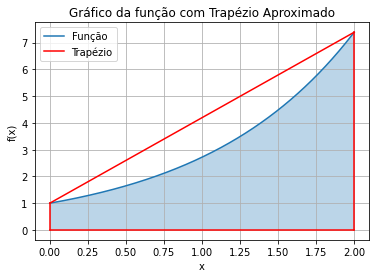

In [5]:
####### Plotando gráfico do método do trapézio #######

x = np.linspace(a, b, 1000)  # Pontos para plotar a função
y = f(x)  # Valores da função nos pontos x

# Plotar o gráfico da função
plt.plot(x, y, label='Função')
plt.fill_between(x, 0, y, alpha=0.3)

# Plotar o trapézio aproximado como integral
plt.plot([a, b], [0, 0], 'red', label='Trapézio')
plt.plot([a, a], [0, f(a)], 'red')
plt.plot([b, b], [0, f(b)],'red')
plt.plot([a, b], [f(a), f(b)],'red')

plt.title('Gráfico da função com Trapézio Aproximado')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

## c) Utilize o método de Simpson para estimar o valor desta área.

Para tanto, é necessário definir uma nova função que implemente o método de Simpson, definido pela fórmula que o professor Vinpicius demonstrou (em parte) em aula: $\frac{h}{3}[f(x_0) + 4f(x_1) + f(x_2)]$

In [6]:
def metodo_de_simpson_simples(f, a, b):
    h = (b - a) / 2
    x = np.array([a, (a + b) / 2, b])
    y = f(x)

    integral = h/3 * np.sum(y[0] + 4*y[1] + y[2])

    return integral

In [7]:
a = 0  # Limite inferior
b = 2  # Limite superior

integral_simpson_simples = metodo_de_simpson_simples(f, a, b)
print("Estimativa da integral pelo método do Simpson:",integral_simpson_simples)

Estimativa da integral pelo método do Simpson: 6.42072780425561


## d) Compare os métodos numéricos com o real valor da área.

Para comparar os métodos do trapéxio e de Simpson, podemos calcular o erro (módulo da diferença em relação ao valor real) de ambos os métodos

In [8]:
# calculando integral analítica
integral_analitica= f(2)-1 # calculando a integral de acordo com o resultado obtido no item a (e^2 - 1)
print("Solução analítica:", integral_analitica)

Solução analítica: 6.38905609893065


In [9]:
# calculando o erro do método do trapézio em relação à solução analítica
erro_metodo_trapezio = abs(integral_analitica - integral_trapezio)
print("O erro do método do trapézio foi de", erro_metodo_trapezio)

O erro do método do trapézio foi de 2.0


In [10]:
# calculando o erro do método de Simpson simples em relação à solução analítica
erro_metodo_simpson_simples = abs(integral_analitica - integral_simpson_simples)
print("O erro do método de Simpson foi de", erro_metodo_simpson_simples)

O erro do método de Simpson foi de 0.031671705324959554


Como podemos ver, o método de Simpson tem um erro mais de $10$ vezes menor que o erro do método do trapézio.

# Exercício 2

a) Considere agora a função $g(x) = e^{−x^2}$ no intervalo [−1, 1] que só poder ser resolvida numericamente. Utilize o método que você considerou mais eficiente no exercício anterior e utilize sua versão composta (considere pelo menos 5 pontos na sua partição) para estimar a área da região determinada por $g(x)$.

Pelo erro calculado, considero que o método mais eficiente foi o de Simpson. Para realizar o método de Simpson composto, podemos definir a função abaixo, que é muito semelhante à função do método de Simpson simples, mas implementa partições (que, nesse caso, precisam ser um número par).

In [11]:
def metodo_de_simpson_composto(g, a, b, n):
    if n % 2 != 0:
        n += 1  # Garante um número par de partições

    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = g(x)

    integral = h/3 * np.sum(y[0:-1:2] + 4*y[1:-1:2] + y[2::2])

    return integral

In [12]:
def g(x):
    return np.exp(-x**2)

In [13]:
a= -1
b= 1
integral_simpson_composta = metodo_de_simpson_composto(g, a, b, 10)
print("Estimativa da integral pelo método do Simpson composto:", integral_simpson_composta)

Estimativa da integral pelo método do Simpson composto: 1.493674109820692
